# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Importing dataset

In [3]:
df=pd.read_csv("c:\\covid19.csv")
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30-01-2020,Kerala,1,0,0,0
1,2,31-01-2020,Kerala,1,0,0,0
2,3,01-02-2020,Kerala,2,0,0,0
3,4,02-02-2020,Kerala,3,0,0,0
4,5,03-02-2020,Kerala,3,0,0,0


In [4]:
df1=df.drop('Sno',axis='columns')
df1

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30-01-2020,Kerala,1,0,0,0
1,31-01-2020,Kerala,1,0,0,0
2,01-02-2020,Kerala,2,0,0,0
3,02-02-2020,Kerala,3,0,0,0
4,03-02-2020,Kerala,3,0,0,0
...,...,...,...,...,...,...
265,21-03-2020,Jammu and Kashmir,4,0,0,0
266,21-03-2020,Ladakh,13,0,0,0
267,21-03-2020,Uttar Pradesh,23,1,9,0
268,21-03-2020,Uttarakhand,3,0,0,0


# Data collection and Using groupby function

In [5]:
g1=df1.groupby(["Date"],sort=False).agg({"ConfirmedIndianNational":"sum","ConfirmedForeignNational":"sum","Cured":"sum","Deaths":"sum"})
g1.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30-01-2020,1,0,0,0
31-01-2020,1,0,0,0
01-02-2020,2,0,0,0
02-02-2020,3,0,0,0
03-02-2020,3,0,0,0


In [6]:
g1['Total_cases']=g1.apply(lambda row: row.ConfirmedIndianNational+ row.ConfirmedForeignNational+ row.Cured+ row.Deaths, axis=1)
g1.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total_cases
Date,,,,,
30-01-2020,1,0,0,0,1
31-01-2020,1,0,0,0,1
01-02-2020,2,0,0,0,2
02-02-2020,3,0,0,0,3
03-02-2020,3,0,0,0,3


In [7]:
g1.shape

(52, 5)

In [259]:
x=g1.index.values
x

array(['30-01-2020', '31-01-2020', '01-02-2020', '02-02-2020',
       '03-02-2020', '04-02-2020', '05-02-2020', '06-02-2020',
       '07-02-2020', '08-02-2020', '09-02-2020', '10-02-2020',
       '11-02-2020', '12-02-2020', '13-02-2020', '14-02-2020',
       '15-02-2020', '16-02-2020', '17-02-2020', '18-02-2020',
       '19-02-2020', '20-02-2020', '21-02-2020', '22-02-2020',
       '23-02-2020', '24-02-2020', '25-02-2020', '26-02-2020',
       '27-02-2020', '28-02-2020', '29-02-2020', '01-03-2020',
       '02-03-2020', '03-03-2020', '04-03-2020', '05-03-2020',
       '06-03-2020', '07-03-2020', '08-03-2020', '09-03-2020',
       '10-03-2020', '11-03-2020', '12-03-2020', '13-03-2020',
       '14-03-2020', '15-03-2020', '16-03-2020', '17-03-2020',
       '18-03-2020', '19-03-2020', '20-03-2020', '21-03-2020'],
      dtype=object)

In [260]:
x.shape

(52,)

In [261]:
y=g1.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'],axis='columns')
y.head()

,Total_cases
Date,
30-01-2020,1
31-01-2020,1
01-02-2020,2
02-02-2020,3
03-02-2020,3


In [262]:
y.shape

(52, 1)

# Data Visualization

Text(0, 0.5, 'No of infected')

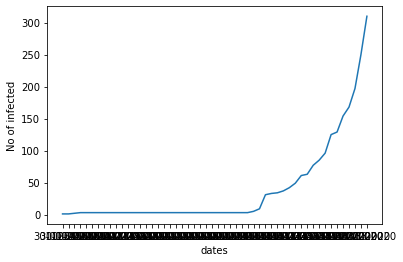

In [263]:
plt.plot(x,y)
plt.xlabel("dates")
plt.ylabel("No of infected")


# Removing dates before 04-3-2020 using outlier removal concept

In [267]:
g2=y[y.Total_cases>30]
g2.head()

,Total_cases
Date,
04-03-2020,31
05-03-2020,33
06-03-2020,34
07-03-2020,37
08-03-2020,42


In [268]:
g2.shape

(18, 1)

# Calculating value of r

In [264]:
sum_r = 0
for i in range(len(y.Total_cases)-1):
    r_intermediate = (y.Total_cases[i+1] - y.Total_cases[i])/y.Total_cases[i]
    sum_r += r_intermediate
sum_r
r_final = sum_r/(len(y.Total_cases)-1)

In [265]:
r_final

0.15548289717820452

# Model the solution

In [266]:
P_t = 31*(2.718282**(26*r_final))
P_t

1766.124339722917